<a href="https://colab.research.google.com/github/raven2human/001-Baslangic-Seviye-Python-Egitimi/blob/main/14_12_2024_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
house = pd.read_csv("house.csv", index_col = 0)
print(house.shape)
house.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house.dtypes

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
house.MSSubClass = house.MSSubClass.astype("str")
house.dtypes

,0
MSSubClass,object
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
house.isnull().sum().sum()

7829

In [ ]:
house.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
miss_percent = house.isnull().mean()
drop_cols = list(miss_percent[miss_percent > 0.1].index)
drop_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
df_drop_cols = house.drop(drop_cols, axis = 1)
df_drop_cols.shape

(1460, 73)

In [ ]:
df_drop_cols.isnull().sum().sum()

601

In [ ]:
df_without_na = df_drop_cols.dropna()
df_without_na.shape

(1338, 73)

In [ ]:
df_without_na

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [ ]:
df_without_na_dummy = pd.get_dummies(df_without_na, drop_first=True)
df_without_na_dummy.shape

(1338, 237)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

X = df_without_na_dummy.drop("SalePrice", axis = 1)
y = df_without_na_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results = pd.DataFrame([], columns = ["r2_mean", "r2_std", "r2_test"])
results.loc["Without NA"] = [scores.mean(), scores.std(), r2_test]
results



,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218


In [ ]:
miss_percent = df_drop_cols.isnull().mean()
miss_percent[miss_percent > 0]


,0
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479


In [ ]:
df_drop_cols.MasVnrArea = df_drop_cols.MasVnrArea.fillna(0)
df_drop_cols.BsmtQual = df_drop_cols.BsmtQual.fillna("None")
df_drop_cols.BsmtCond = df_drop_cols.BsmtCond.fillna("None")
df_drop_cols.BsmtExposure = df_drop_cols.BsmtExposure.fillna("None")
df_drop_cols.BsmtFinType1 = df_drop_cols.BsmtFinType1.fillna("None")
df_drop_cols.BsmtFinType2 = df_drop_cols.BsmtFinType2.fillna("None")
df_drop_cols.Electrical = df_drop_cols.Electrical.fillna("None")
df_drop_cols.GarageType = df_drop_cols.GarageType.fillna("None")
df_drop_cols.GarageYrBlt = df_drop_cols.GarageYrBlt.fillna(0)
df_drop_cols.GarageFinish = df_drop_cols.GarageFinish.fillna("None")
df_drop_cols.GarageQual = df_drop_cols.GarageQual.fillna("None")
df_drop_cols.GarageCond = df_drop_cols.GarageCond.fillna("None")
df_drop_cols.shape

(1460, 73)

In [ ]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results.loc["Fill NA"] = [scores.mean(), scores.std(), r2_test]
results


(1460, 252)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582


In [ ]:
df_drop_cols["LotFrontage"] = house.LotFrontage.fillna(0)
df_drop_cols["Alley"] = house.Alley.fillna("None")
df_drop_cols["FireplaceQu"] = house.FireplaceQu.fillna("None")
df_drop_cols["PoolQC"] = house.PoolQC.fillna("None")
df_drop_cols["Fence"] = house.Fence.fillna("None")
df_drop_cols["MiscFeature"] = house.MiscFeature.fillna("None")
df_drop_cols["MasVnrType"] = house.MasVnrType.fillna("None")
print(df_drop_cols.shape)

(1460, 80)


In [ ]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results.loc["Full Data"] = [scores.mean(), scores.std(), r2_test]
results


(1460, 274)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897


In [ ]:
df_new = df_drop_cols.copy()

In [ ]:
category_percent = df_new.MSSubClass.value_counts() / len(df_new)
category = list(category_percent[category_percent < 0.01].index)
df_new.MSSubClass = df_new.MSSubClass.replace(category, "Other")
df_new.MSSubClass.value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results.loc["MSSubClass Simple"] = [scores.mean(), scores.std(), r2_test]
results

(1460, 272)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499


In [ ]:
cat_cols = df_new.select_dtypes(include = "object").columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Alley', 'FireplaceQu',
       'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'],
      dtype='object')

In [ ]:
def merge_category(x, thr = 0.01):
    category_percent = x.value_counts()/len(x)
    category = list(category_percent[category_percent < thr].index)
    if len(category) > 1:
        x = x.replace(category, "Other")

    return x

df_new[cat_cols] = df_new[cat_cols].apply(merge_category)
df_new.shape

(1460, 80)

In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results.loc["All Category Simple"] = [scores.mean(), scores.std(), r2_test]
results

(1460, 217)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965


In [ ]:
df_new.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df_new.ExterQual = df_new.ExterQual.replace({"Fa":1, "TA":2, "Gd":3, "Ex":4})
df_new.ExterQual.unique()

<ipython-input-28-cff4cd42d424>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new.ExterQual = df_new.ExterQual.replace({"Fa":1, "TA":2, "Gd":3, "Ex":4})


array([3, 2, 4, 1])

In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv = 10)

results.loc["ExterQual Ordinal"] = [scores.mean(), scores.std(), r2_test]
results

(1460, 215)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.01)

selector.fit(X_train)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

results.loc["Variance Threshold"] = [scores.mean(), scores.std(), r2_test]
results

(1168, 196)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k = "all")
selector.fit(X_train, y_train)

fstats = pd.Series(selector.scores_, index = X_train.columns).sort_values(ascending = False)
fstats

,0
OverallQual,1879.151818
GrLivArea,1093.390361
ExterQual,927.122414
GarageCars,813.186816
GarageArea,744.064301
...,...
Condition2_Other,0.047660
BsmtFinSF2,0.038298
RoofStyle_Other,0.010914
Neighborhood_SawyerW,0.007409


In [ ]:
k = 108

best_cols = fstats[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

results.loc["Select KBest"] = [scores.mean(), scores.std(), r2_test]
results


(1168, 108)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.812241,0.119639,0.871132


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = fstats[:k].index
    X_train_new = X_train[best_cols]
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

108


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

selector = RFE(DecisionTreeRegressor(random_state = 42), n_features_to_select = 1)
selector.fit(X_train, y_train)

ranks = pd.Series(selector.ranking_, index = X_train.columns).sort_values()
ranks

,0
OverallQual,1
GrLivArea,2
TotalBsmtSF,3
YearBuilt,4
LotArea,5
...,...
Exterior1st_CemntBd,210
HouseStyle_SFoyer,211
GarageCond_None,212
Condition1_PosN,213


In [ ]:
k = 87

best_cols = ranks[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

results.loc["RFE"] = [scores.mean(), scores.std(), r2_test]
results

(1168, 87)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.812241,0.119639,0.871132
RFE,0.804142,0.129354,0.859622


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = ranks[:k].index
    X_train_new = X_train[best_cols]
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

87


In [ ]:
dt_mdl = DecisionTreeRegressor(random_state = 42)
dt_mdl.fit(X_train, y_train)
importances = pd.Series(dt_mdl.feature_importances_, index = X_train.columns).sort_values(ascending = False)
importances

,0
OverallQual,0.634357
GrLivArea,0.105921
TotalBsmtSF,0.031588
2ndFlrSF,0.029569
1stFlrSF,0.017808
...,...
GarageType_Other,0.000000
GarageFinish_None,0.000000
MSSubClass_80,0.000000
Exterior1st_WdShing,0.000000


In [ ]:
k = 116

best_cols = importances[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

results.loc["Embedded Feature Selection"] = [scores.mean(), scores.std(), r2_test]
results

(1168, 116)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.812241,0.119639,0.871132
RFE,0.804142,0.129354,0.859622
Embedded Feature Selection,0.812479,0.132489,0.859646


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = importances[:k].index
    X_train_new = X_train[best_cols]
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

116


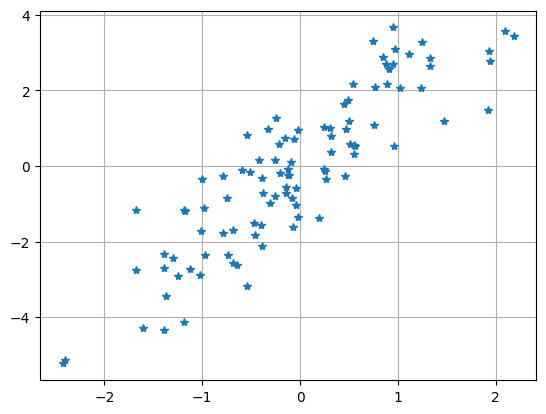

In [ ]:
x1 = np.random.normal(size = 100)
x2 = 2 * x1 + np.random.normal(size = 100)

plt.plot(x1,x2, "*")
plt.grid()

(-6.124853878265421, 4.718087134735544, -1.201642365485332, 9.641298647515633)

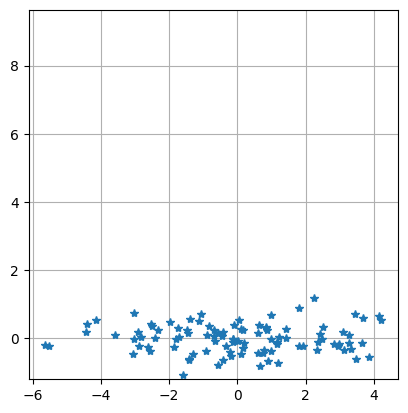

In [ ]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(np.c_[x1,x2])
x_transformed = pca.transform(np.c_[x1,x2])
plt.plot(x_transformed[:,0], x_transformed[:,1], "*")
plt.grid()
plt.axis("square")

In [ ]:
pca = PCA(n_components = 156)
pca.fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_test = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

results.loc["PCA"] = [scores.mean(), scores.std(), r2_test]
results

(1168, 156)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.812241,0.119639,0.871132
RFE,0.804142,0.129354,0.859622
Embedded Feature Selection,0.812479,0.132489,0.859646


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    pca = PCA(n_components = k)
    pca.fit(X_train)
    X_train_new = pca.transform(X_train)
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

156


In [ ]:
house = pd.read_csv("house.csv", index_col = 0)

X = house.drop("SalePrice", axis = 1)
y = house.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cat_cols = X_train.select_dtypes(include = "object").columns
num_cols = X_train.select_dtypes(exclude = "object").columns

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso

imputer_num = KNNImputer()
imputer_num.fit(X_train[num_cols])
X_train_num = imputer_num.transform(X_train[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

imputer_cat = SimpleImputer(strategy = "most_frequent")
imputer_cat.fit(X_train[cat_cols])
X_train_cat = imputer_cat.transform(X_train[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

X_train_new = np.c_[X_train_num, X_train_cat]
X_test_new = np.c_[X_test_num, X_test_cat]

selector = SelectKBest(f_regression, k = 100)
selector.fit(X_train_new, y_train)

X_train_new = selector.transform(X_train_new)
X_test_new = selector.transform(X_test_new)

mdl = Lasso(alpha = 10)
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2_score(y_test, y_pred)

0.8660762328250396

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocess_categorical = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

preprocess_numerical = Pipeline([
    ("imputer", KNNImputer()),
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer([
    ("categorical_preprocess", preprocess_categorical, cat_cols),
    ("numerical_preprocess", preprocess_numerical, num_cols)
])

ml_pipe = Pipeline([
    ("preprocess", preprocess),
    ("selector", SelectKBest(f_regression)),
    ("mdl", Lasso())
])

ml_pipe.fit(X_train, y_train)
y_pred = ml_pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8143027516562893

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "mdl__alpha" :[0.1,1,10,100],
    "selector__k":[75,100,125],
    "preprocess__numerical_preprocess__imputer__n_neighbors":[2,3,5]
}

grid = GridSearchCV(ml_pipe, params, cv = 10)
grid.fit(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+10, tolerance: 6.409e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+09, tolerance: 6.352e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+11, tolerance: 6.031e

{'mdl__alpha': 100,
 'preprocess__numerical_preprocess__imputer__n_neighbors': 2,
 'selector__k': 125}

In [ ]:
grid.best_estimator_.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
r2_score(y_test, y_pred)

0.8721033438143868

In [ ]:
def create_pipeline(mdl):
    preprocess_categorical = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

    preprocess_numerical = Pipeline([
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler())
    ])

    preprocess = ColumnTransformer([
        ("categorical_preprocess", preprocess_categorical, cat_cols),
        ("numerical_preprocess", preprocess_numerical, num_cols)
    ])

    ml_pipe = Pipeline([
        ("preprocess", preprocess),
        ("selector", SelectKBest(f_regression)),
        ("mdl", mdl)
    ])

    return ml_pipe

ml_pipe = create_pipeline(LinearRegression())
ml_pipe.fit(X_train, y_train)
y_pred = ml_pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8143075228593488

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
models = {
    "Decision Tree": DecisionTreeRegressor(random_state = 42),
    "Random Forest": RandomForestRegressor(random_state = 42),
}


model_params = {
    "Decision Tree" : {"mdl__max_depth" : [3,5,7,15,25], "selector__k" : [75,100,125]},
    "Random Forest" : {"mdl__n_estimators" : [10,25,50,100],
                       "mdl__max_depth" : [3,5,7,15,25],
                       "selector__k" : [75,100,125]}
}

for name, model in models.items():
    ml_pipe = create_pipeline(model)
    grid = GridSearchCV(ml_pipe, model_params[name], cv = 10)
    grid.fit(X_train, y_train)
    print(name, grid.best_params_, grid.best_score_)